In [1]:
#Importing Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")


In [2]:
from google.colab import files

# Upload your Excel file
uploaded = files.upload()



Saving Raw Dataset.xlsx to Raw Dataset.xlsx


In [4]:
#Quick Check Data
df = pd.read_excel("Raw Dataset.xlsx")
print(df)

            Date  SKU_ID Warehouse_ID Supplier_ID Region  Units_Sold  \
0     2024-01-01   SKU_1         WH_1       SUP_8   West          10   
1     2024-01-02   SKU_1         WH_1       SUP_8   West          17   
2     2024-01-03   SKU_1         WH_1       SUP_8  North          35   
3     2024-01-04   SKU_1         WH_1       SUP_8  South          24   
4     2024-01-05   SKU_1         WH_1       SUP_8   West          21   
...          ...     ...          ...         ...    ...         ...   
91245 2024-12-26  SKU_50         WH_5      SUP_10  South          17   
91246 2024-12-27  SKU_50         WH_5      SUP_10  South          21   
91247 2024-12-28  SKU_50         WH_5      SUP_10   East          17   
91248 2024-12-29  SKU_50         WH_5      SUP_10  South          24   
91249 2024-12-30  SKU_50         WH_5      SUP_10   West          15   

       Inventory_Level  Supplier_Lead_Time_Days  Reorder_Point  \
0                  592                       14            379   
1  

In [5]:
#Data Cleaning
print("Missing values:\n", df.isnull().sum())

df = df.drop_duplicates()

if "Date" in df.columns:
    df["Date"] = pd.to_datetime(df["Date"])

df.info()

Missing values:
 Date                       0
SKU_ID                     0
Warehouse_ID               0
Supplier_ID                0
Region                     0
Units_Sold                 0
Inventory_Level            0
Supplier_Lead_Time_Days    0
Reorder_Point              0
Order_Quantity             0
Unit_Cost                  0
Unit_Price                 0
Promotion_Flag             0
Stockout_Flag              0
Demand_Forecast            0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91250 entries, 0 to 91249
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     91250 non-null  datetime64[ns]
 1   SKU_ID                   91250 non-null  object        
 2   Warehouse_ID             91250 non-null  object        
 3   Supplier_ID              91250 non-null  object        
 4   Region                   91250 non-null  object        

In [6]:
#Descriptive Stats
df.describe()


,Date,Units_Sold,Inventory_Level,Supplier_Lead_Time_Days,Reorder_Point,Order_Quantity,Unit_Cost,Unit_Price,Promotion_Flag,Stockout_Flag,Demand_Forecast
count,91250,91250.000000,91250.000000,91250.000000,91250.000000,91250.000000,91250.000000,91250.000000,91250.000000,91250.0,91250.000000
mean,2024-07-01 00:00:00,20.054564,471.522312,7.984000,300.068000,19.272493,12.203320,18.261800,0.101589,0.0,20.082033
min,2024-01-01 00:00:00,0.000000,168.000000,2.000000,201.000000,0.000000,5.020000,6.950000,0.000000,0.0,0.000000
25%,2024-04-01 00:00:00,13.000000,370.000000,4.000000,252.000000,0.000000,8.180000,12.000000,0.000000,0.0,12.950000
50%,2024-07-01 00:00:00,20.000000,461.000000,8.000000,300.000000,0.000000,11.990000,18.180000,0.000000,0.0,19.950000
75%,2024-09-30 00:00:00,27.000000,564.000000,11.000000,346.000000,0.000000,16.320000,23.390000,0.000000,0.0,26.930000
max,2024-12-30 00:00:00,59.000000,990.000000,14.000000,398.000000,499.000000,19.760000,35.100000,1.000000,0.0,61.420000
std,NaN,9.068602,133.488002,3.907929,54.879945,82.340831,4.574982,7.121136,0.302109,0.0,9.503955


/tmp/ipython-input-1261037648.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="SKU_ID", y="Units_Sold", data=top_skus, palette="Blues_d")


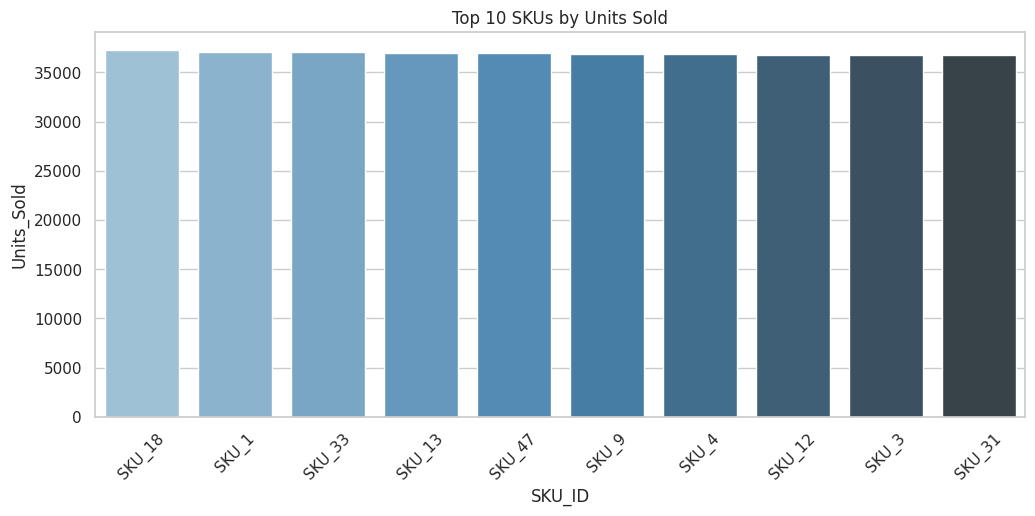

In [10]:
#EDA Visualization
#Top 10 SKU's
if "SKU_ID" in df.columns:
    top_skus = df.groupby("SKU_ID")["Units_Sold"].sum().nlargest(10).reset_index()

    plt.figure(figsize=(12,5))
    sns.barplot(x="SKU_ID", y="Units_Sold", data=top_skus, palette="Blues_d")
    plt.title("Top 10 SKUs by Units Sold")
    plt.xticks(rotation=45)
    plt.show()


In [11]:
# Create Revenue and Profit columns
if "Units_Sold" in df.columns and "Unit_Price" in df.columns:
    df["Revenue"] = df["Units_Sold"] * df["Unit_Price"]

if "Units_Sold" in df.columns and "Unit_Cost" in df.columns:
    df["Profit"] = df["Revenue"] - (df["Units_Sold"] * df["Unit_Cost"])


/tmp/ipython-input-4262971132.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Warehouse_ID", y="Revenue", data=warehouse_rev, palette="Greens_d")


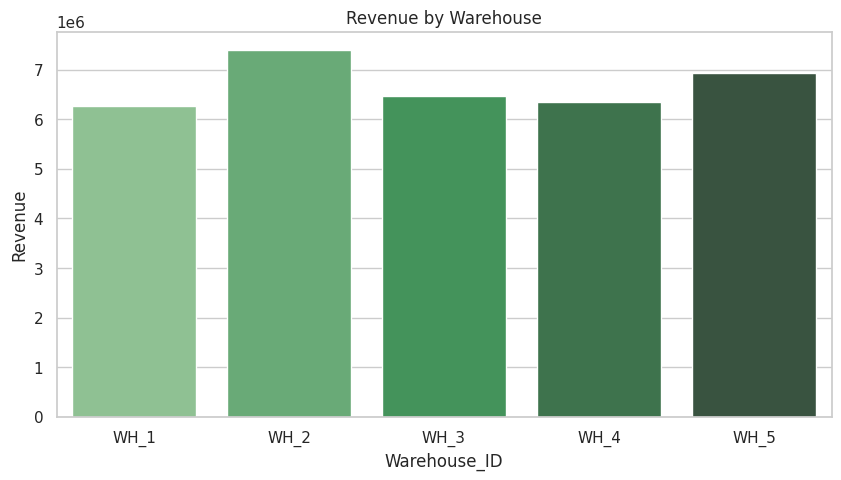

In [13]:
#Revenue By Warehouse
if "Warehouse_ID" in df.columns:
    warehouse_rev = df.groupby("Warehouse_ID")["Revenue"].sum().reset_index()

    plt.figure(figsize=(10,5))
    sns.barplot(x="Warehouse_ID", y="Revenue", data=warehouse_rev, palette="Greens_d")
    plt.title("Revenue by Warehouse")
    plt.show()


/tmp/ipython-input-2983351452.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Promotion_Flag", y="Revenue", data=df, palette="Set2")


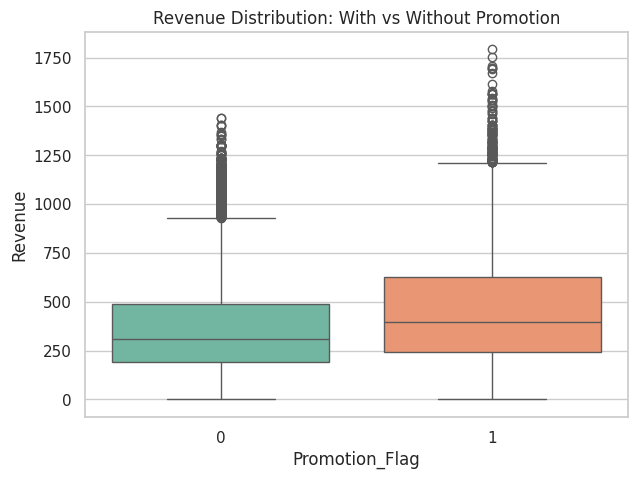

In [14]:
#Promotions Effect
if "Promotion_Flag" in df.columns:
    plt.figure(figsize=(7,5))
    sns.boxplot(x="Promotion_Flag", y="Revenue", data=df, palette="Set2")
    plt.title("Revenue Distribution: With vs Without Promotion")
    plt.show()


/tmp/ipython-input-2722002533.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Stockout_Flag", data=df, palette="coolwarm")


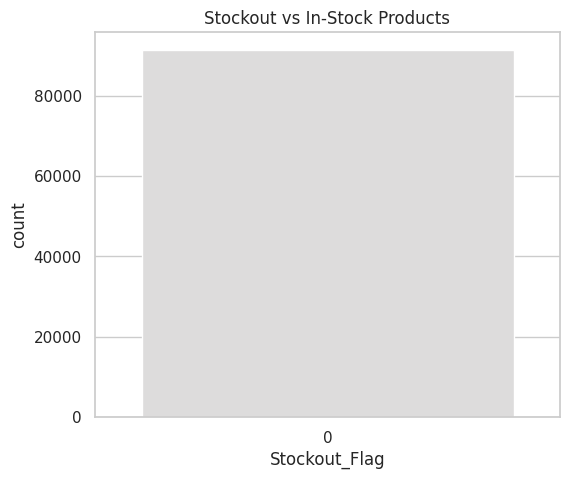

In [17]:
#Stockout Frequency
if "Stockout_Flag" in df.columns:
    plt.figure(figsize=(6,5))
    sns.countplot(x="Stockout_Flag", data=df, palette="coolwarm")
    plt.title("Stockout vs In-Stock Products")
    plt.show()


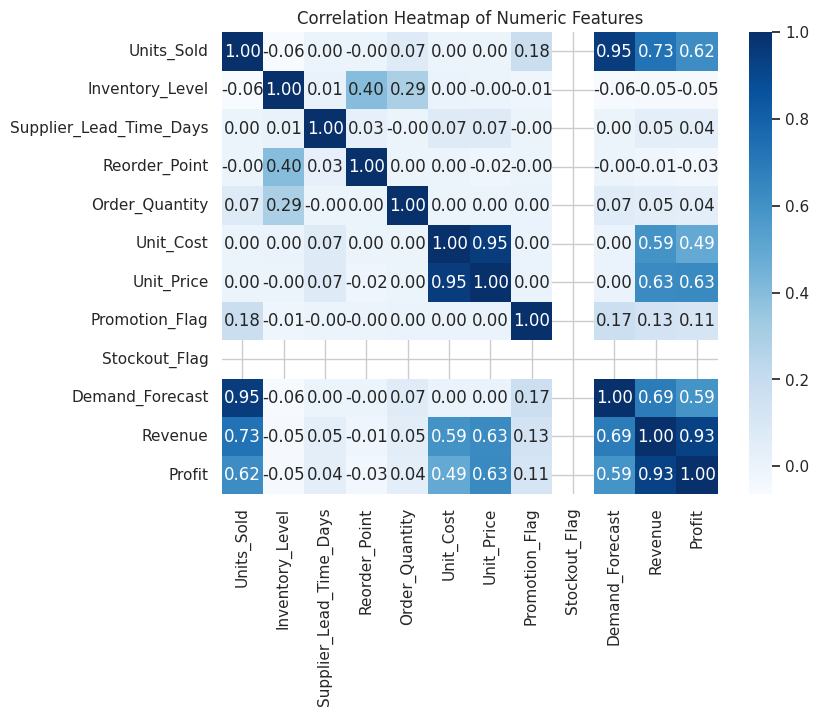

In [18]:
#Correlation Heatmap
numeric_df = df.select_dtypes(include=["int64", "float64"])

plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


In [19]:
df.to_csv("cleaned_supply_chain.csv", index=False)
files.download("cleaned_supply_chain.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>